In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Q3: Interesting Networks

In [53]:
def find_giant_component(G):
    # input: G <nx.Graph>
    # output: (giant_component <nx.Graph>, size_of_component <int> )
    c=sorted(nx.connected_components(G), key = len, reverse=True)
    cl = list(c)
    H = G.subgraph(cl[0])
    size = len(cl[0])
    return (H, size)

In [54]:

G_polblog = nx.read_gml("polblogs/polblogs.gml",label='id')

(H, size) = find_giant_component(G_polblog)
print(size)

color = []
for node in H.nodes:
    color.append(H.nodes[node]['value'])
    
plt.figure(figsize=(12,12))

# nx.draw_networkx(H, with_labels=False, node_size=10, node_color=color)
# plt.axis('off')

1222


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [66]:
# helper code
def compute_clustering_related_things(G,print_output=False):
    # in case of a MultiGraph
    G = nx.Graph(G)
    ave_clustering = nx.average_clustering(G)
    i = list(nx.clustering(G).values())
    smallest_clustering_num = np.argmin(i)
    smallest_clustering_coef = i[smallest_clustering_num]
    largest_clustering_num = np.argmax(i)
    largest_clustering_coef = i[largest_clustering_num]
    APL = nx.average_shortest_path_length(G)
    if print_output:
        print(f'''           ave_clustering = {ave_clustering}
           smallest_clustering_num = {smallest_clustering_num}
           smallest_clustering_coef = {smallest_clustering_coef}
           largest_clustering_num = {largest_clustering_num}
           largest_clustering_coef = { largest_clustering_coef}
           APL= {APL}''')
    return (ave_clustering,
           smallest_clustering_num,
           smallest_clustering_coef,
           largest_clustering_num,
           largest_clustering_coef,
           APL)

In [61]:
(H, size) = find_giant_component(G_polblog)

In [62]:
coefs = compute_clustering_related_things(H, print_output=True)

ave_clustering = 0.3202546194373159
           smallest_clustering_num = 3
           smallest_clustering_coef = 0
           largest_clustering_num = (34,)
           largest_clustering_coef = 1.0
           APL= 2.7375296736998864


In [63]:
H_reconstructed = nx.gnm_random_graph(
    H.number_of_nodes(),
    H.number_of_edges())

In [67]:
compute_clustering_related_things(H_reconstructed, print_output=True)

           ave_clustering = 0.025909381010620305
           smallest_clustering_num = 670
           smallest_clustering_coef = 0
           largest_clustering_num = 597
           largest_clustering_coef = 0.05263157894736842
           APL= 2.4123984123984124


(0.025909381010620305, 670, 0, 597, 0.05263157894736842, 2.4123984123984124)

In [152]:
G_HIV = nx.read_edgelist("/Users/xieewenz/Downloads/hiv/out.hiv")
color_HIV = [1]+[2 for i in range(len(G_HIV)-1)]
plt.figure(figsize=(8,8))

# nx.draw_networkx(G_HIV, with_labels=True, node_size=500, node_color = color_HIV, font_color='black', cmap=plt.get_cmap('Set3'))
# plt.axis('off')

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [69]:
(H_HIV, size) = find_giant_component(G_HIV)

In [99]:
compute_clustering_related_things(H_HIV, print_output=True)
# interesting how there is a 1.0 in the clustering,
# it should be all 0s

           ave_clustering = 0.041666666666666664
           smallest_clustering_num = 0
           smallest_clustering_coef = 0
           largest_clustering_num = 27
           largest_clustering_coef = 1.0
           APL=


(0.041666666666666664, 0, 0, 27, 1.0)

In [74]:
H_HIV_reconstructed = nx.gnm_random_graph(
    H_HIV.number_of_nodes(),
    H_HIV.number_of_edges())

In [79]:
compute_clustering_related_things(H_HIV_reconstructed,print_output=True)

           ave_clustering = 0.030833333333333334
           smallest_clustering_num = 0
           smallest_clustering_coef = 0
           largest_clustering_num = 9
           largest_clustering_coef = 1.0
           APL=


(0.030833333333333334, 0, 0, 9, 1.0)

### Q4: Generate Watts-Strogatz network

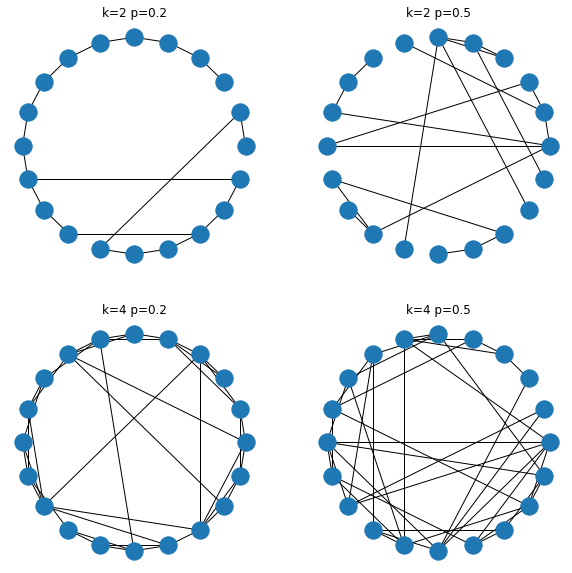

In [118]:
combinations = ((2,0.2),(2,0.5),(4,0.2),(4,0.5))
Gs = []
plt.figure(figsize=(10,10))
plt.axis('off')
for num,(k,p) in enumerate(combinations):
    Gs.append(nx.watts_strogatz_graph(20,k,p))
    plt.subplot(220+num+1)
    nx.draw_circular(Gs[num])
    plt.title(f"k={str(k)} p={str(p)}")

### Q5: APL and ACC of Watts-Strogatz network

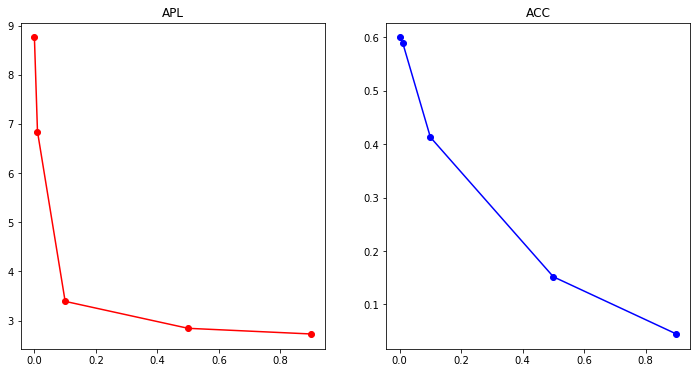

In [153]:
# ps = np.concatenate([np.linspace(0,0.2,100),np.linspace(0.2,0.95,100)],axis=0)
ps = (0,0.01,0.1,0.5,0.9)
Gs2 = []
APLs = []
ACCs = []
for num,p in enumerate(ps):
    G0=nx.watts_strogatz_graph(100,6,p)
    Gs2.append(G0)
    APLs.append(nx.average_shortest_path_length(G0))
    ACCs.append(nx.average_clustering(G0))
# formatting
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("APL")
plt.plot(ps,APLs,"ro")
plt.plot(ps,APLs,"r-")
plt.subplot(122)
plt.title("ACC")
plt.plot(ps,ACCs,"bo")
plt.plot(ps,ACCs,"b-")

### Q6: APL of GNM from 10 to 5000

In [0]:
GNM_APL = []
# x = [i for i in range(10,10000)]
x=[10,100,200,500,1000,2000]
for n in x:
    m = 5*n
    G0 = nx.gnm_random_graph(n,m)
    GNM_APL.append(nx.average_shortest_path_length(G0))

In [0]:
# I tested m=10n, m=4n so I saved the results (I didn't pickle them though haha)
APL5 = ccc.copy()

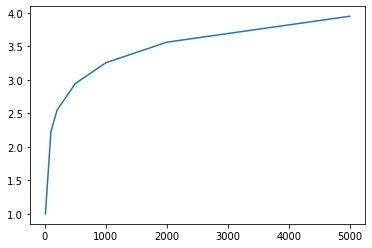

In [14]:
plt.plot([10,100,200,500,1000,2000,5000],APL5)